<a href="https://colab.research.google.com/github/trong-khanh-1109/CS114.L22.KHCL/blob/main/Train_data_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Liên kết drive và import các thư viện cần thiết

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import pandas as pd
from sklearn import svm, metrics
from PIL import Image

# Đọc dữ liệu từ drive

In [ ]:
# Lấy đường dẫn đến các file csv
link_X_train = '/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/X_train_HOG.csv'
link_Y_train = '/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/Y_train_HOG.csv'
link_X_vali = '/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/X_val_HOG.csv'
link_Y_vali = '/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/Y_val_HOG.csv'
link_X_test = '/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/X_test_HOG.csv'
link_Y_test = '/content/drive/MyDrive/Data_Final_Project/Save_Data_HOG/Y_test_HOG.csv'

In [ ]:
# Đọc và chuyển dữ liệu sang ndarray
X_train = pd.read_csv(link_X_train,header=None).to_numpy()
Y_train = pd.read_csv(link_Y_train,header=None).to_numpy()
X_vali = pd.read_csv(link_X_vali,header=None).to_numpy()
Y_vali = pd.read_csv(link_Y_vali,header=None).to_numpy()
X_test = pd.read_csv(link_X_test,header=None).to_numpy()
Y_test = pd.read_csv(link_Y_test,header=None).to_numpy()

In [ ]:
# Kích thước dữ liệu
print("Tập train: ", len(X_train),len(Y_train))
print("Tập validation: ", len(X_vali),len(Y_vali))
print("Tập test: ", len(X_test),len(Y_test))

Tập train:  19278 19278
Tập validation:  4863 4863
Tập test:  5384 5384


In [ ]:
labels = os.listdir('/content/drive/MyDrive/Data_Final_Project/data')
labels = sorted(labels)
print(labels)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


#Chỉnh size các khung hiển thị confusion matrix

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,20

#**Train Model**







###**Model Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LG = LogisticRegression(C = 0.1, max_iter=1000)
model_LG.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Lưu model
import joblib
filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_LG.sav'
joblib.dump(model_LG, filename)
#model_LG = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_LG.sav')
#model_LG

['/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_LG.sav']

	Validation
Accuracy:  0.6997738021797244




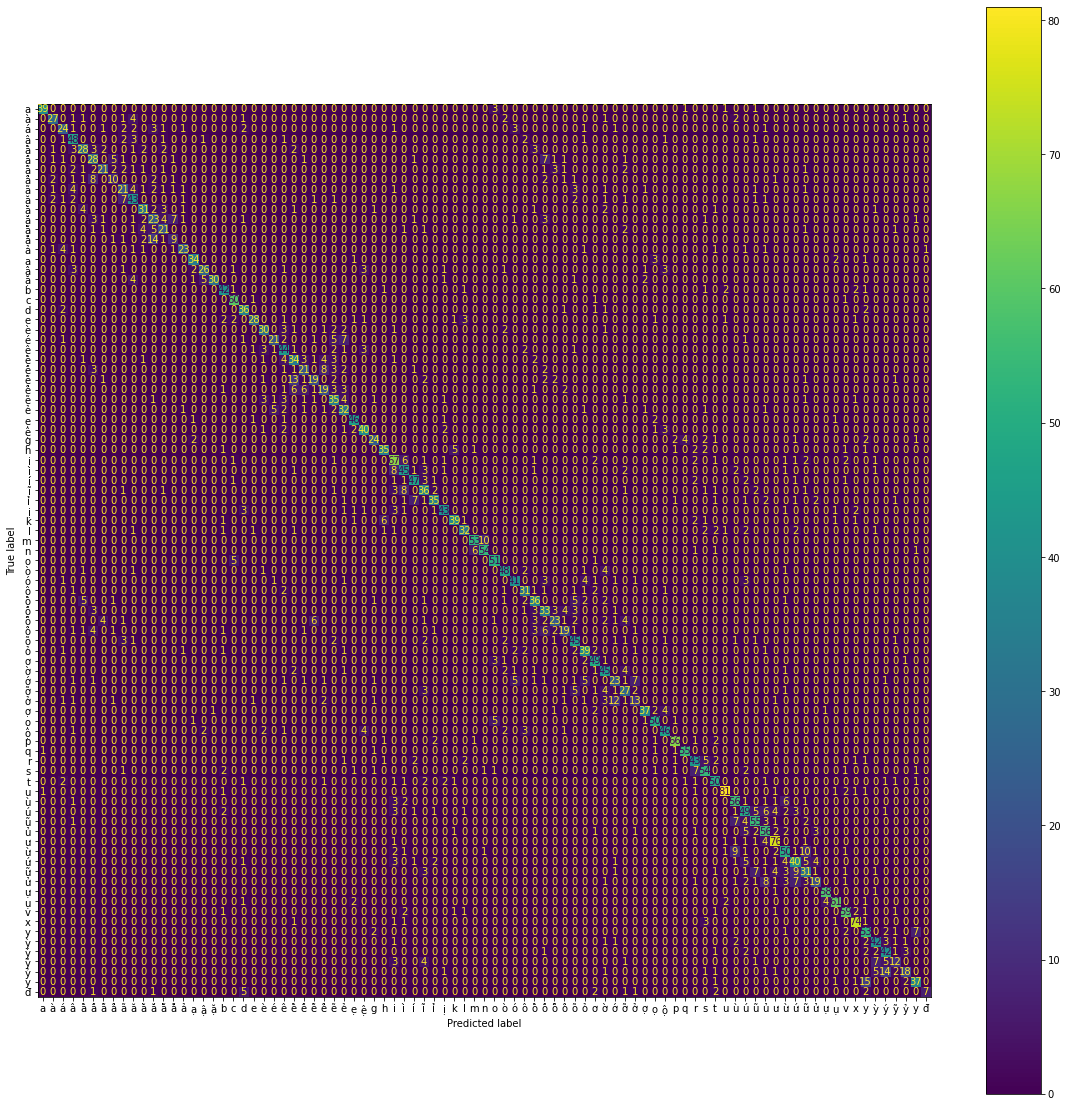

              precision    recall  f1-score   support

           a       0.95      0.87      0.91        45
          à       0.77      0.66      0.71        41
          á       0.62      0.55      0.58        44
          â       0.66      0.77      0.71        62
         ầ       0.65      0.60      0.62        47
         ấ       0.49      0.57      0.53        49
         ẫ       0.68      0.51      0.58        41
         ẩ       0.48      0.33      0.39        30
          ã       0.48      0.48      0.48        44
          ă       0.63      0.67      0.65        64
         ằ       0.69      0.65      0.67        48
         ắ       0.43      0.46      0.45        50
         ẵ       0.58      0.54      0.56        39
         ẳ       0.45      0.32      0.38        28
          ả       0.77      0.62      0.69        37
          ạ       0.83      0.83      0.83        41
         ậ       0.76      0.60      0.68        43
         ặ       0.97    

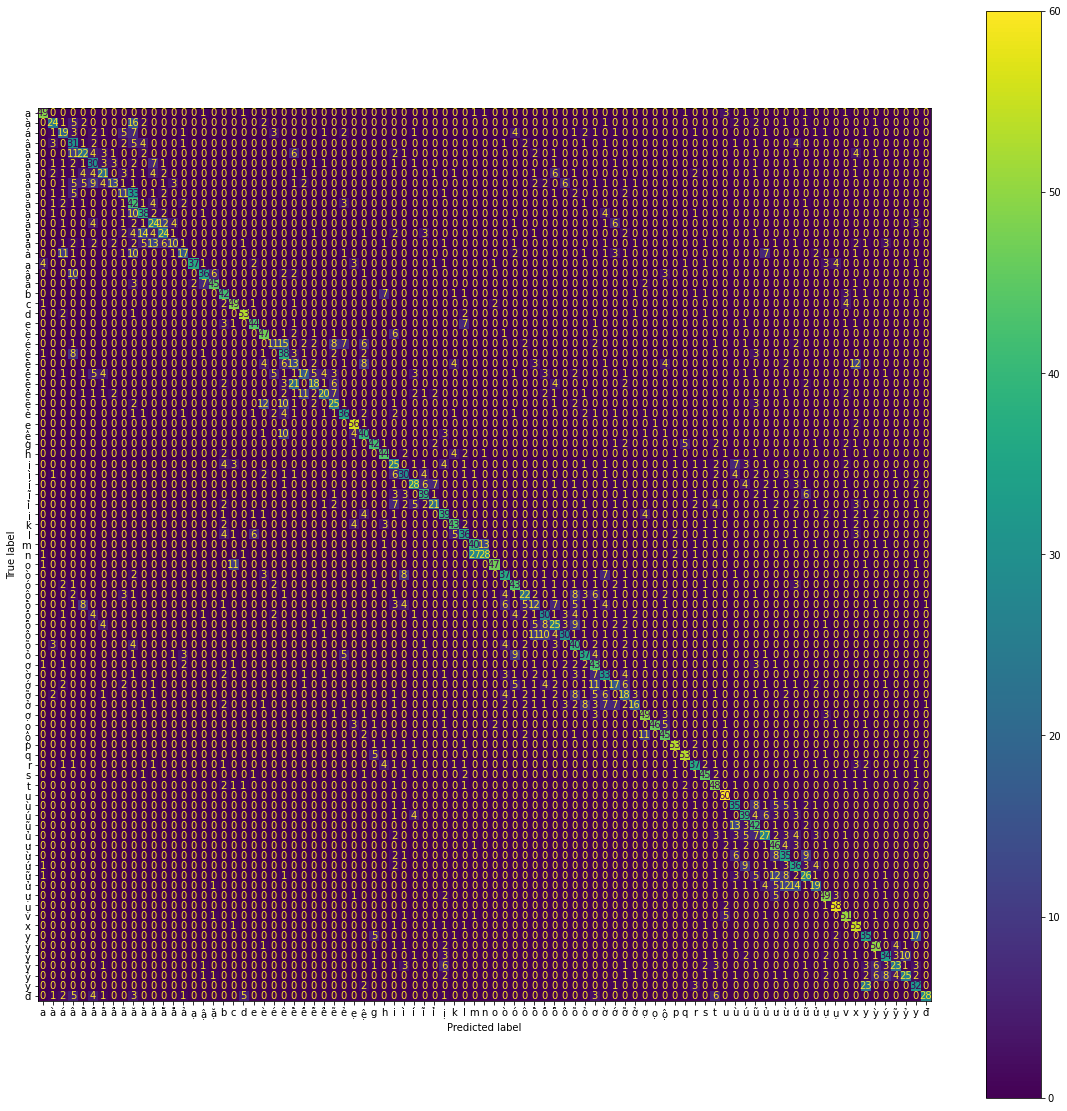

              precision    recall  f1-score   support

           a       0.82      0.82      0.82        60
          à       0.59      0.40      0.48        60
          á       0.37      0.32      0.34        60
          â       0.32      0.52      0.40        60
         ầ       0.47      0.37      0.41        60
         ấ       0.42      0.50      0.46        60
         ẫ       0.47      0.35      0.40        60
         ẩ       0.62      0.22      0.32        60
          ã       0.33      0.18      0.24        60
          ă       0.27      0.70      0.39        60
         ằ       0.54      0.63      0.58        60
         ắ       0.39      0.40      0.39        60
         ẵ       0.48      0.40      0.44        60
         ẳ       0.50      0.17      0.25        60
          ả       0.59      0.28      0.38        60
          ạ       0.95      0.62      0.75        60
         ậ       0.72      0.60      0.65        60
         ặ       0.83    

In [ ]:
y_pred_vali = model_LG.predict(X_vali)
y_pred_test = model_LG.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_LG,X_vali,Y_vali,display_labels=labels)
plt.show()
result = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(result)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_LG,X_test,Y_test,display_labels=labels)
plt.show()
result = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(result)


#Model Support Vector Machine(SVM)

> Sử dụng kernel linear



In [ ]:
from sklearn.svm import SVC
model_SVM_linear = SVC(C=1000, kernel = 'linear', gamma=0.001)
model_SVM_linear.fit(X_train, Y_train)
y_pred_vali = model_SVM_linear.predict(X_vali)
y_pred_test = model_SVM_linear.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Lưu model
import joblib
filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_linear.sav'
joblib.dump(model_SVM_linear, filename)
#loaded_model_SVM_linear = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_linear.sav')
#loaded_model_SVM_linear

['/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_linear.sav']

	Validation
Accuracy:  0.734320378367263




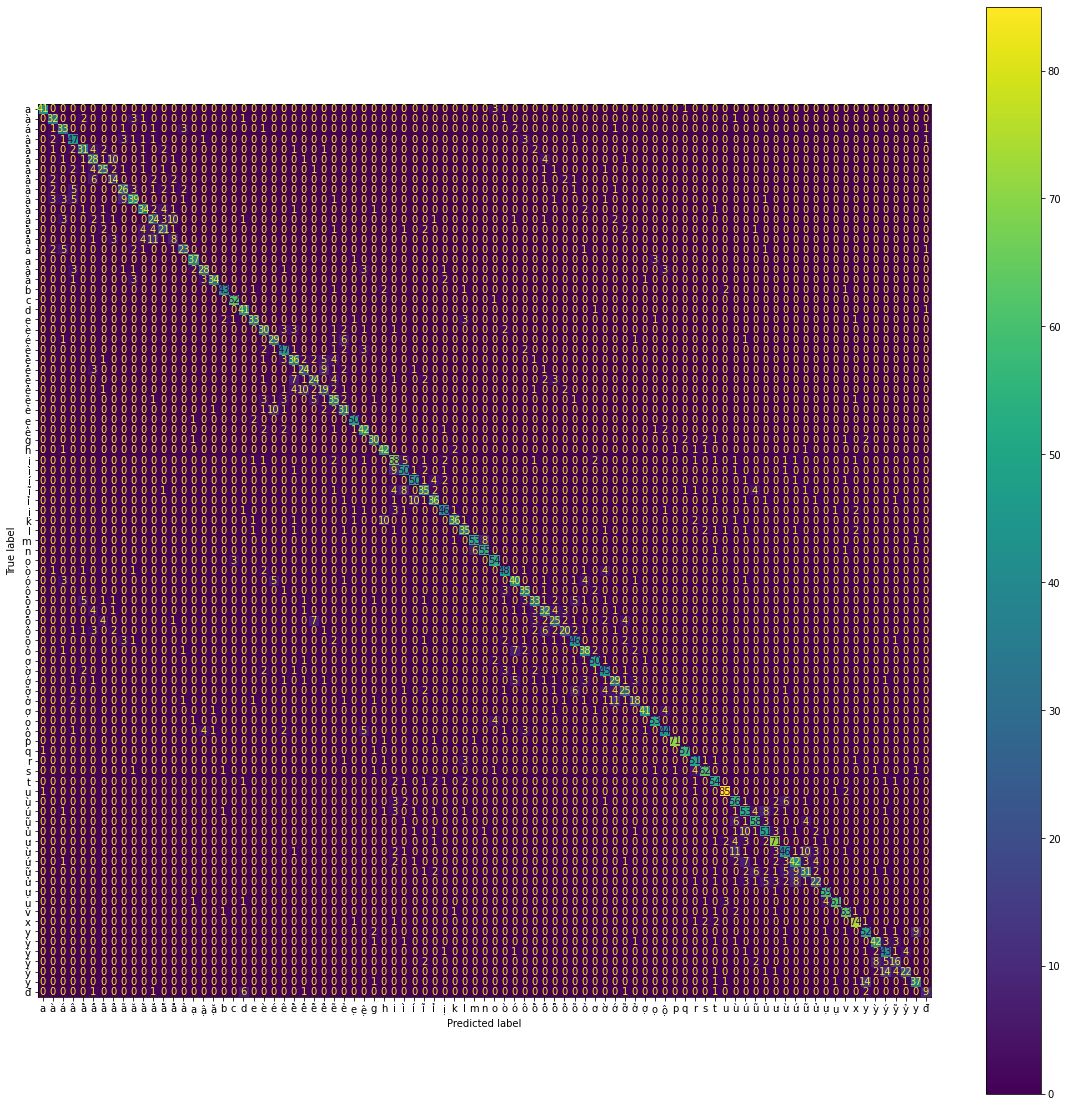

              precision    recall  f1-score   support

           a       0.95      0.91      0.93        45
          à       0.70      0.78      0.74        41
          á       0.61      0.75      0.67        44
          â       0.67      0.76      0.71        62
         ầ       0.69      0.66      0.67        47
         ấ       0.49      0.57      0.53        49
         ẫ       0.64      0.61      0.62        41
         ẩ       0.41      0.47      0.44        30
          ã       0.59      0.59      0.59        44
          ă       0.71      0.61      0.66        64
         ằ       0.71      0.71      0.71        48
         ắ       0.50      0.48      0.49        50
         ẵ       0.60      0.54      0.57        39
         ẳ       0.31      0.29      0.30        28
          ả       0.74      0.62      0.68        37
          ạ       0.86      0.90      0.88        41
         ậ       0.78      0.65      0.71        43
         ặ       0.92    

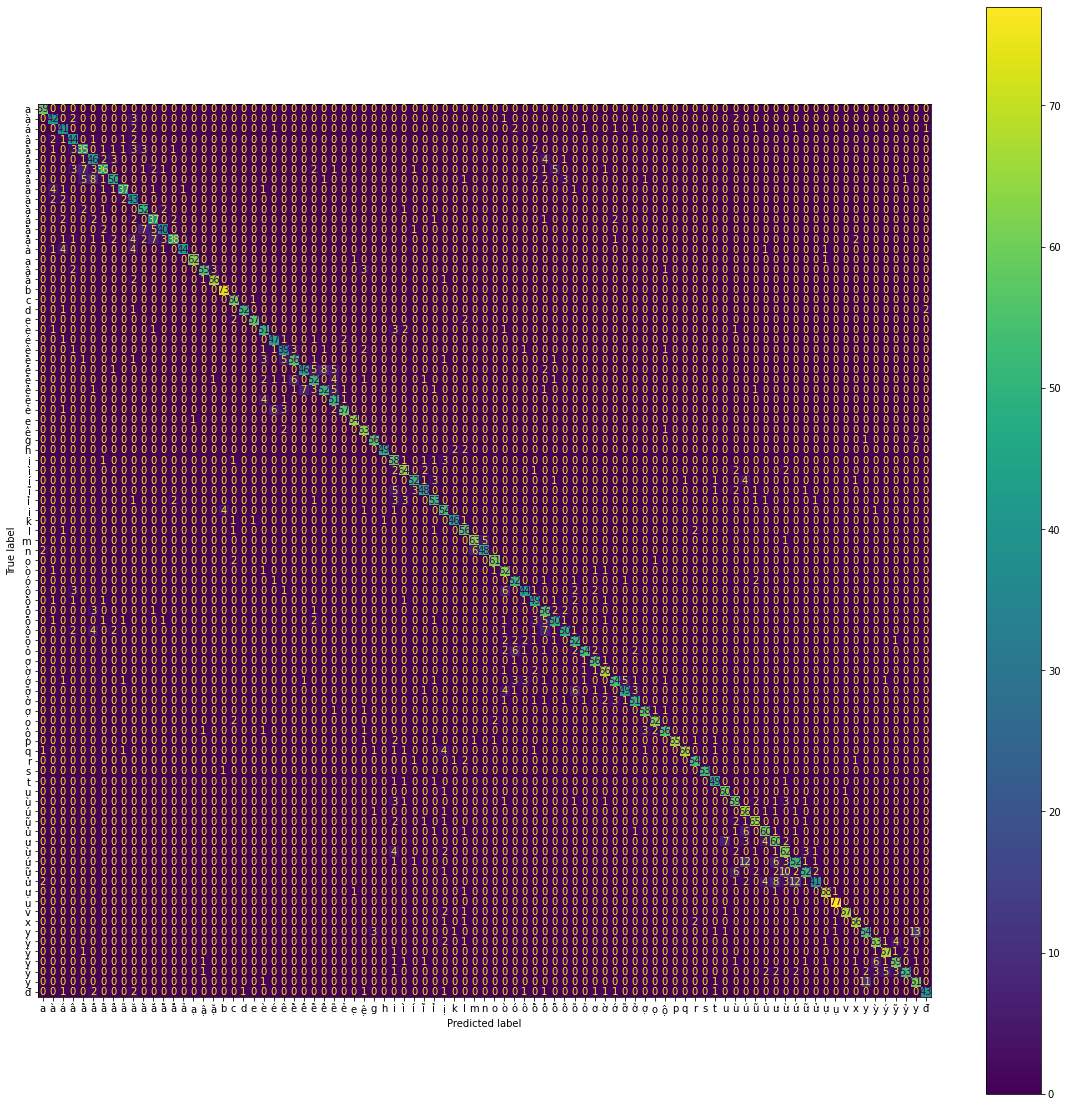

              precision    recall  f1-score   support

           a       0.92      1.00      0.96        59
          à       0.75      0.84      0.79        50
          á       0.71      0.79      0.75        52
          â       0.71      0.86      0.78        51
         ầ       0.67      0.69      0.68        51
         ấ       0.65      0.81      0.72        57
         ẫ       0.75      0.56      0.64        64
         ẩ       0.83      0.67      0.74        75
          ã       0.84      0.77      0.80        48
          ă       0.61      0.88      0.72        49
         ằ       0.80      0.90      0.85        58
         ắ       0.69      0.76      0.72        49
         ẵ       0.83      0.73      0.78        55
         ẳ       0.88      0.60      0.72        63
          ả       0.98      0.79      0.87        56
          ạ       0.98      0.97      0.98        64
         ậ       0.93      0.86      0.89        64
         ặ       0.94    

In [ ]:
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_linear,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_linear,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)




> Sử dụng kernel Polynomial



In [ ]:
from sklearn.svm import SVC
model_SVM_poly = SVC(C=1000, kernel = 'poly', gamma=0.001)
model_SVM_poly.fit(X_train, Y_train)
y_pred_vali = model_SVM_poly.predict(X_vali)
y_pred_test = model_SVM_poly.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Lưu model
import joblib
#filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_poly.sav'
#joblib.dump(model_SVM_poly, filename)
loaded_model_SVM_poly = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_poly.sav')
loaded_model_SVM_poly

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_poly,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_poly,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)

NameError: ignored

> Sử dụng kernel rbf

In [ ]:
from sklearn.svm import SVC
model_SVM_rbf = SVC(C=1000, kernel = 'rbf', gamma=0.001)
model_SVM_rbf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Lưu model
import joblib
#filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_rbf.sav'
#joblib.dump(model_SVM_rbf, filename)
model_SVM_rbf = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_SVM_rbf.sav')
model_SVM_rbf

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

	Validation
Accuracy:  0.738844334772774




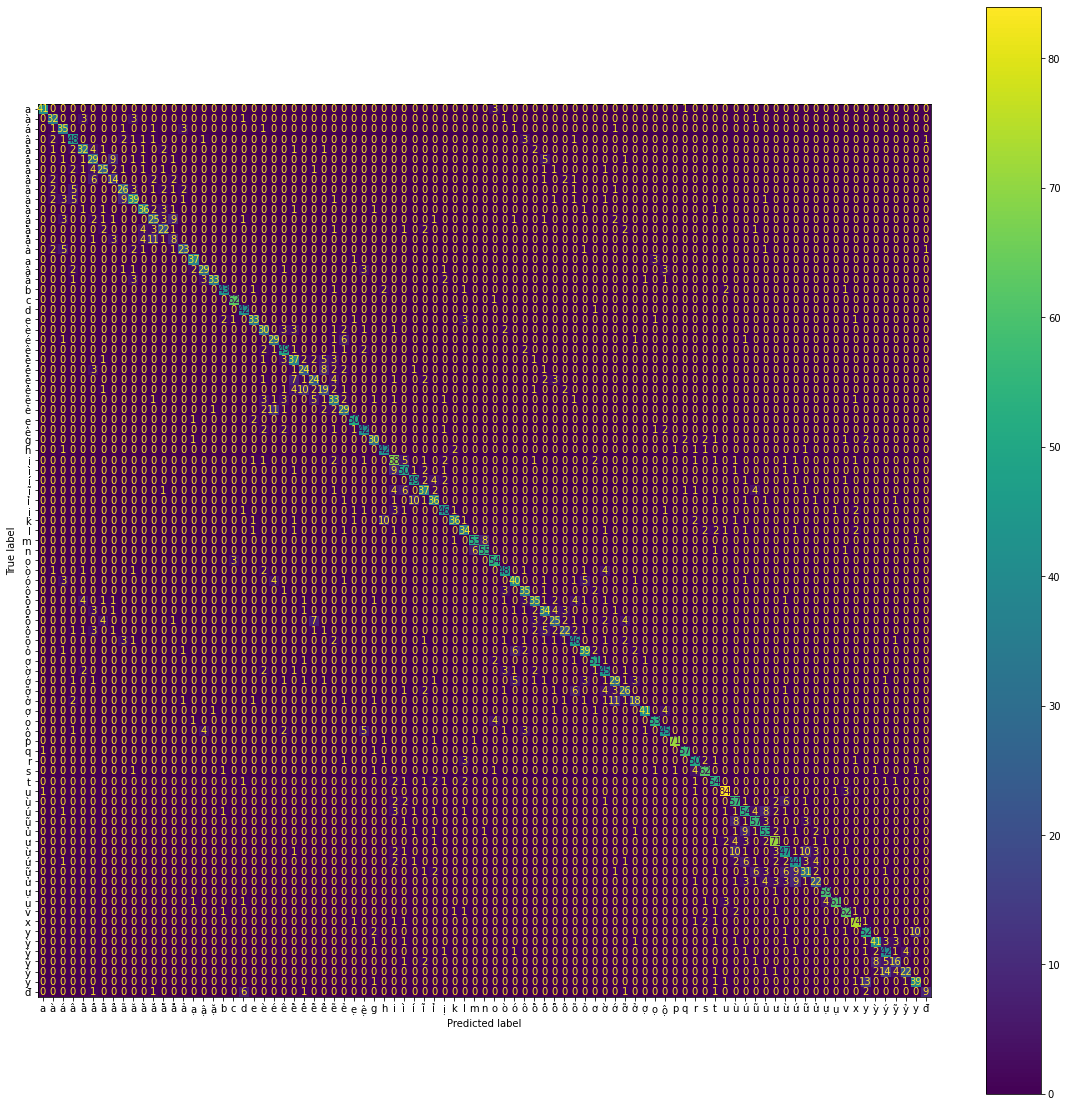

              precision    recall  f1-score   support

           a       0.95      0.91      0.93        45
          à       0.71      0.78      0.74        41
          á       0.62      0.80      0.70        44
          â       0.69      0.77      0.73        62
         ầ       0.70      0.68      0.69        47
         ấ       0.51      0.59      0.55        49
         ẫ       0.68      0.61      0.64        41
         ẩ       0.44      0.47      0.45        30
          ã       0.60      0.59      0.60        44
          ă       0.70      0.61      0.65        64
         ằ       0.73      0.75      0.74        48
         ắ       0.52      0.50      0.51        50
         ẵ       0.63      0.56      0.59        39
         ẳ       0.32      0.29      0.30        28
          ả       0.74      0.62      0.68        37
          ạ       0.86      0.90      0.88        41
         ậ       0.78      0.67      0.72        43
         ặ       0.94    

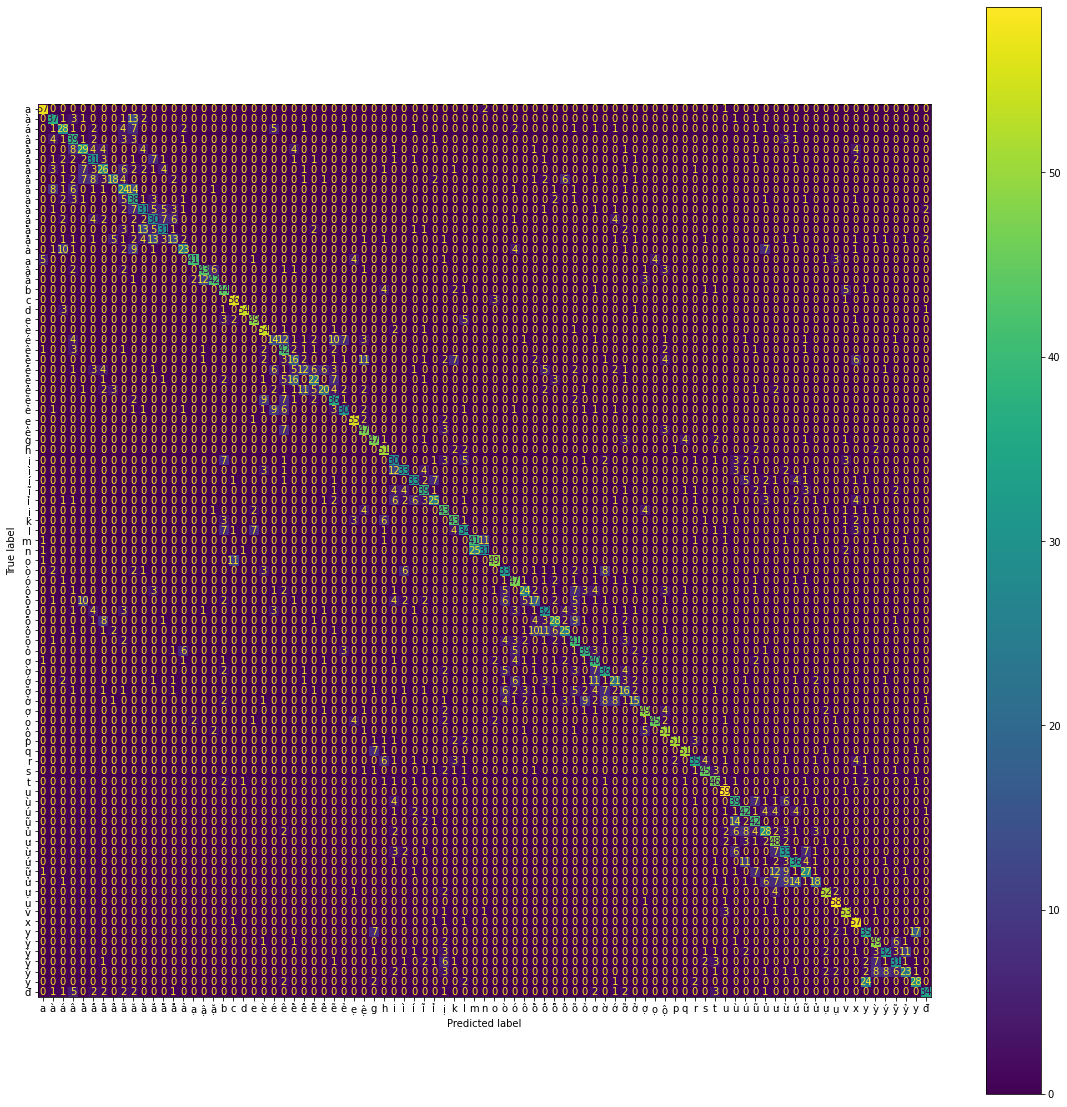

              precision    recall  f1-score   support

           a       0.84      0.95      0.89        60
          à       0.60      0.62      0.61        60
          á       0.47      0.47      0.47        60
          â       0.45      0.65      0.53        60
         ầ       0.49      0.48      0.49        60
         ấ       0.47      0.52      0.49        60
         ẫ       0.44      0.43      0.44        60
         ẩ       0.62      0.30      0.40        60
          ã       0.36      0.40      0.38        60
          ă       0.36      0.63      0.46        60
         ằ       0.51      0.52      0.51        60
         ắ       0.43      0.50      0.46        60
         ẵ       0.58      0.52      0.55        60
         ẳ       0.45      0.22      0.29        60
          ả       0.61      0.38      0.47        60
          ạ       0.91      0.68      0.78        60
         ậ       0.74      0.72      0.73        60
         ặ       0.81    

In [ ]:
y_pred_vali = model_SVM_rbf.predict(X_vali)
y_pred_test = model_SVM_rbf.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_SVM_rbf,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_SVM_rbf,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)


#**Model MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
Y_vali = Y_vali.ravel()
Y_train

array([ 0,  0,  0, ..., 88, 88, 88])

In [ ]:
model_MLP = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=500)
model_MLP.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 1000, 1000), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Lưu model
import joblib
#filename = '/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_MLP.sav'
#joblib.dump(model_MLP, filename)
model_MLP = joblib.load('/content/drive/MyDrive/Data_Final_Project/Save_Model_HOG/model_MLP.sav')
model_MLP

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000, 1000, 1000), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

	Validation
Accuracy:  0.7740078141065186




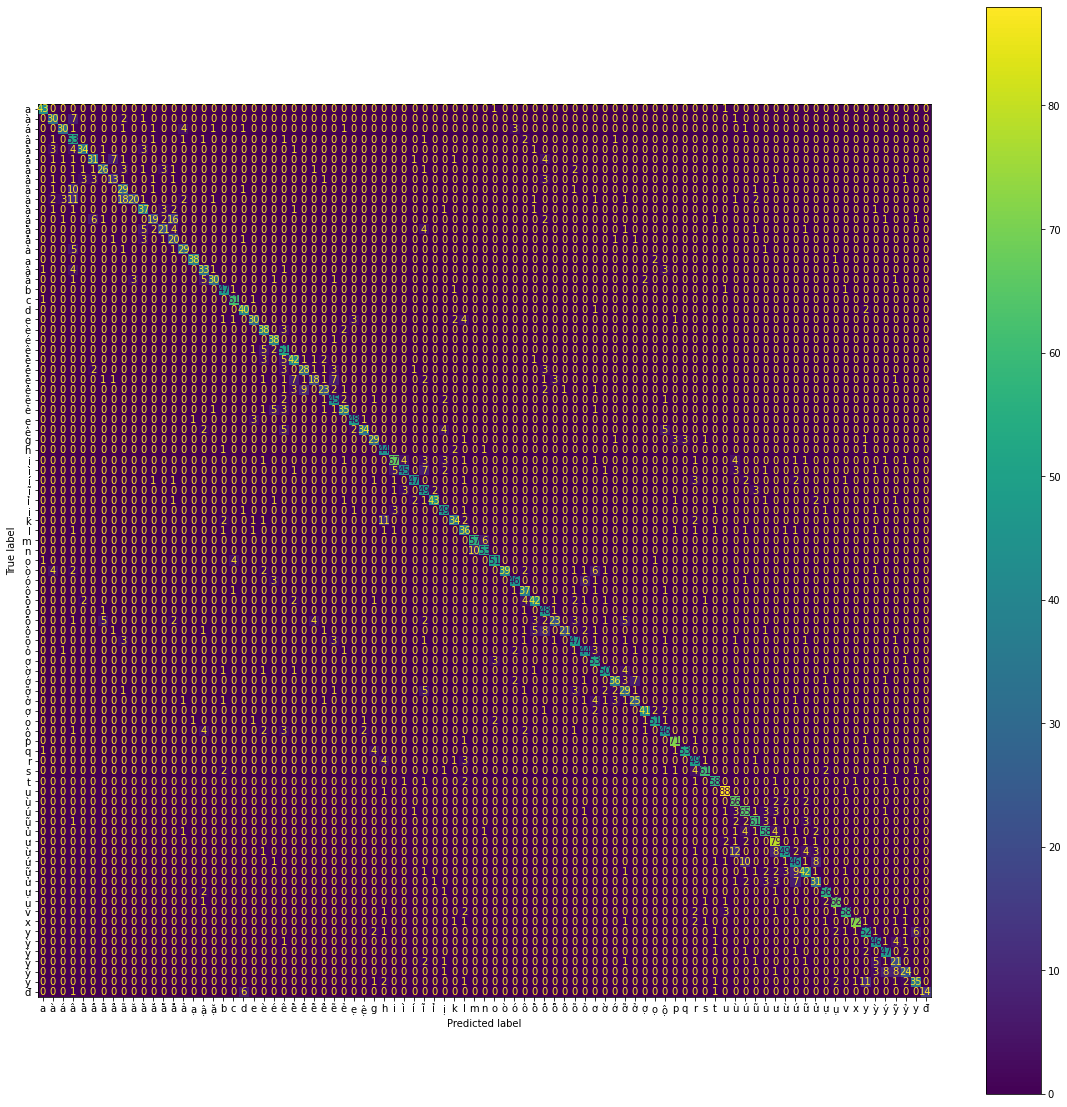

              precision    recall  f1-score   support

           a       0.91      0.96      0.93        45
          à       0.68      0.73      0.71        41
          á       0.83      0.68      0.75        44
          â       0.50      0.85      0.63        62
         ầ       0.85      0.72      0.78        47
         ấ       0.72      0.63      0.67        49
         ẫ       0.72      0.63      0.68        41
         ẩ       0.57      0.43      0.49        30
          ã       0.48      0.66      0.56        44
          ă       0.87      0.31      0.46        64
         ằ       0.73      0.77      0.75        48
         ắ       0.73      0.38      0.50        50
         ẵ       0.70      0.54      0.61        39
         ẳ       0.41      0.71      0.52        28
          ả       0.76      0.78      0.77        37
          ạ       0.95      0.93      0.94        41
         ậ       0.67      0.77      0.72        43
         ặ       0.88    

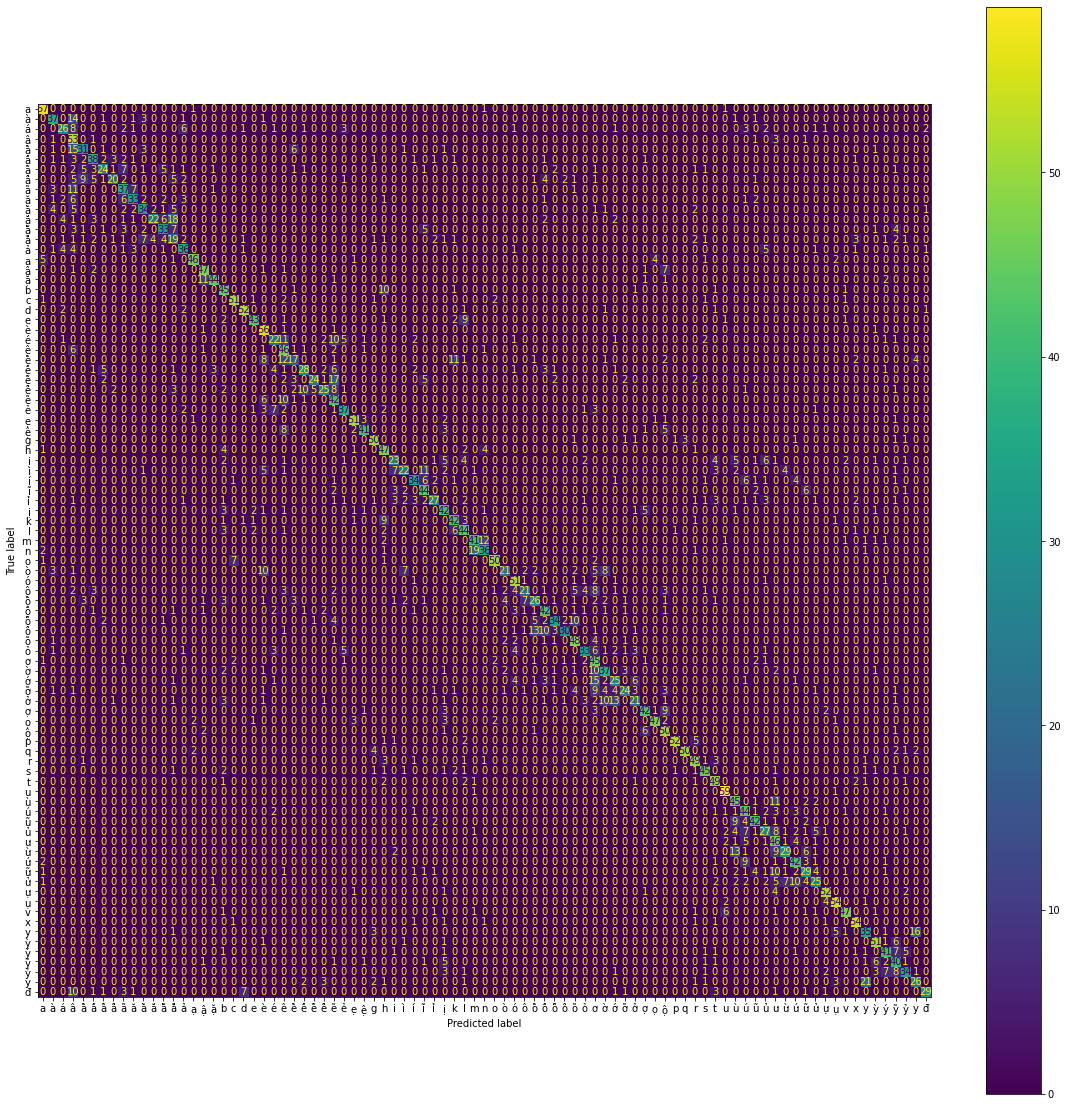

              precision    recall  f1-score   support

           a       0.79      0.95      0.86        60
          à       0.67      0.62      0.64        60
          á       0.63      0.43      0.51        60
          â       0.35      0.88      0.50        60
         ầ       0.58      0.52      0.55        60
         ấ       0.63      0.63      0.63        60
         ẫ       0.60      0.40      0.48        60
         ẩ       0.71      0.33      0.45        60
          ã       0.54      0.62      0.58        60
          ă       0.66      0.55      0.60        60
         ằ       0.64      0.57      0.60        60
         ắ       0.79      0.37      0.50        60
         ẵ       0.62      0.55      0.58        60
         ẳ       0.29      0.32      0.30        60
          ả       0.63      0.60      0.62        60
          ạ       0.88      0.77      0.82        60
         ậ       0.72      0.78      0.75        60
         ặ       0.88    

In [ ]:
y_pred_vali = model_MLP.predict(X_vali)
y_pred_test = model_MLP.predict(X_test)
print('\tValidation')
print('Accuracy: ',accuracy_score(y_true=Y_vali,y_pred=y_pred_vali))
print("\n")
cm = plot_confusion_matrix(model_MLP,X_vali,Y_vali,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_vali,y_pred=y_pred_vali,target_names=labels)
print(rp)

print('\tTest')
print('Accuracy: ',accuracy_score(y_true=Y_test,y_pred=y_pred_test))
print('\n')
cm = plot_confusion_matrix(model_MLP,X_test,Y_test,display_labels=labels)
plt.show()
rp = classification_report(y_true=Y_test,y_pred=y_pred_test,target_names=labels)
print(rp)
